In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
with np.load('data.npz') as data:
    A, C = data['A'], data['C']

In [31]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype=A.dtype)
    A = np.flipud(A) 
    for i, row in enumerate(A):
        a[i*w:i*w+w] = row
    return a

In [32]:
def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype=a.dtype)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w]
    return np.flipud(A)

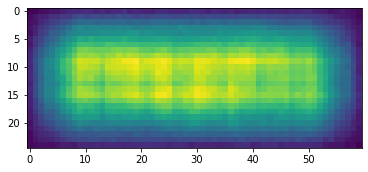

In [33]:
plt.imshow(A)

# Проверим действие функций

In [35]:
a = mat2vec(A)

In [36]:
a.shape

(1500,)

In [37]:
B = vec2mat(a,(25,60))

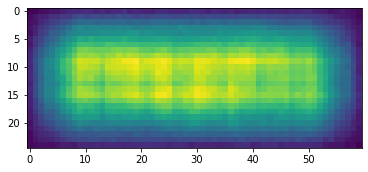

In [38]:
plt.imshow(B)

# Посмотрим как действует фильтр С (без шумов)

In [39]:
X0 = np.zeros((16,51))
X0[2:12,10] = 1
X0[2:12,20] = 1
X0[2,10:20] = 1
X0[12,10:21] = 1

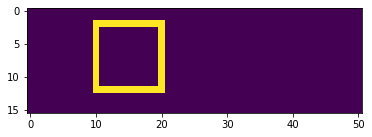

In [40]:
plt.imshow(X0)

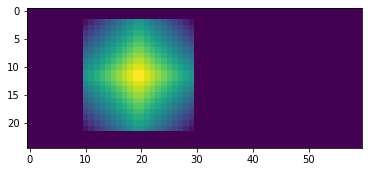

In [42]:
x0 = mat2vec(X0) # превращаем Х в вектор х
x = C @ x0
X = vec2mat(C @ x0, (25,60))
plt.imshow(X) # делаем из С @ x обратно матрицу

In [47]:
# Найдем х0 наивным способом, зная х:

x0_guess = np.linalg.pinv(C) @ x
X0_guess = vec2mat(x0_guess, (16,51))

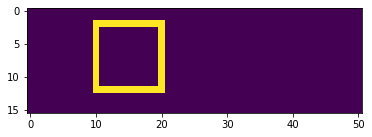

In [49]:
plt.imshow(X0_guess)

In [50]:
# Однако такая процедура нахождения X0 зная X не будет работать с матрицей А (так как там есть шум)
# Cистема a = C @ c0 - переопределенная

#  Cпособ решения через Svd:

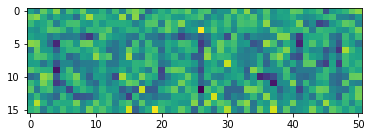

In [55]:
u, s, vh = np.linalg.svd(C)
sigma = np.zeros((816, 1500))
s1 = s **(-1)
np.fill_diagonal(sigma, s1[0:450])
a0_guess = vh.T @ sigma @ u.T @ a
A0_guess = vec2mat(a0_guess, (16, 51))
plt.imshow(A0_guess)

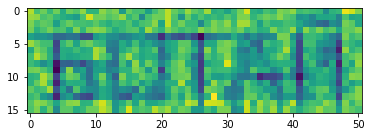

In [57]:
u, s, vh = np.linalg.svd(C)
sigma = np.zeros((816, 1500))
s1 = s **(-1)
np.fill_diagonal(sigma, s1[0:210])
a0_guess = vh.T @ sigma @ u.T @ a
A0_guess = vec2mat(a0_guess, (16, 51))
plt.imshow(A0_guess)

# "Ботай"